In [557]:
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram , linkage ,fcluster
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import dmba
from sklearn.preprocessing import LabelEncoder
from scipy.cluster import hierarchy
from sklearn.preprocessing import StandardScaler

In [558]:
df = dmba.load_data("Universities.csv")

In [559]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   College Name              1302 non-null   object 
 1   State                     1302 non-null   object 
 2   Public (1)/ Private (2)   1302 non-null   int64  
 3   # appli. rec'd            1292 non-null   float64
 4   # appl. accepted          1291 non-null   float64
 5   # new stud. enrolled      1297 non-null   float64
 6   % new stud. from top 10%  1067 non-null   float64
 7   % new stud. from top 25%  1100 non-null   float64
 8   # FT undergrad            1299 non-null   float64
 9   # PT undergrad            1270 non-null   float64
 10  in-state tuition          1272 non-null   float64
 11  out-of-state tuition      1282 non-null   float64
 12  room                      981 non-null    float64
 13  board                     804 non-null    float64
 14  add. fee

In [560]:
df.columns

Index(['College Name', 'State', 'Public (1)/ Private (2)', '# appli. rec'd',
       '# appl. accepted', '# new stud. enrolled', '% new stud. from top 10%',
       '% new stud. from top 25%', '# FT undergrad', '# PT undergrad',
       'in-state tuition', 'out-of-state tuition', 'room', 'board',
       'add. fees', 'estim. book costs', 'estim. personal $', '% fac. w/PHD',
       'stud./fac. ratio', 'Graduation rate'],
      dtype='object')

In [561]:
df.head()

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
3,University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
4,Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0


In [562]:
df.set_index('College Name', inplace=True)


In [563]:
df.head()

,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
College Name,,,,,,,,,,,,,,,,,,,
Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0


In [564]:
df = df.dropna()

In [565]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 471 entries, Alaska Pacific University to University of Wyoming
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   State                     471 non-null    object 
 1   Public (1)/ Private (2)   471 non-null    int64  
 2   # appli. rec'd            471 non-null    float64
 3   # appl. accepted          471 non-null    float64
 4   # new stud. enrolled      471 non-null    float64
 5   % new stud. from top 10%  471 non-null    float64
 6   % new stud. from top 25%  471 non-null    float64
 7   # FT undergrad            471 non-null    float64
 8   # PT undergrad            471 non-null    float64
 9   in-state tuition          471 non-null    float64
 10  out-of-state tuition      471 non-null    float64
 11  room                      471 non-null    float64
 12  board                     471 non-null    float64
 13  add. fees                 47

In [566]:
continuous_measurement = df.select_dtypes(include=['float64'])
continuous_measurement.head()


,# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
College Name,,,,,,,,,,,,,,,,,
Alaska Pacific University,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
University of Alaska Southeast,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
Birmingham-Southern College,805.0,588.0,287.0,67.0,88.0,1376.0,207.0,11660.0,11660.0,2050.0,2430.0,120.0,400.0,900.0,74.0,14.0,72.0
Huntingdon College,608.0,520.0,127.0,26.0,47.0,538.0,126.0,8080.0,8080.0,1380.0,2540.0,100.0,500.0,1100.0,63.0,11.4,44.0
Talladega College,4414.0,1500.0,335.0,30.0,60.0,908.0,119.0,5666.0,5666.0,1424.0,1540.0,418.0,1000.0,1400.0,56.0,15.5,46.0


In [567]:
df.columns

Index(['State', 'Public (1)/ Private (2)', '# appli. rec'd',
       '# appl. accepted', '# new stud. enrolled', '% new stud. from top 10%',
       '% new stud. from top 25%', '# FT undergrad', '# PT undergrad',
       'in-state tuition', 'out-of-state tuition', 'room', 'board',
       'add. fees', 'estim. book costs', 'estim. personal $', '% fac. w/PHD',
       'stud./fac. ratio', 'Graduation rate'],
      dtype='object')

In [568]:
continuous_measurement = df.select_dtypes(include=['float64'])
continuous_measurement.head()


,# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
College Name,,,,,,,,,,,,,,,,,
Alaska Pacific University,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
University of Alaska Southeast,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
Birmingham-Southern College,805.0,588.0,287.0,67.0,88.0,1376.0,207.0,11660.0,11660.0,2050.0,2430.0,120.0,400.0,900.0,74.0,14.0,72.0
Huntingdon College,608.0,520.0,127.0,26.0,47.0,538.0,126.0,8080.0,8080.0,1380.0,2540.0,100.0,500.0,1100.0,63.0,11.4,44.0
Talladega College,4414.0,1500.0,335.0,30.0,60.0,908.0,119.0,5666.0,5666.0,1424.0,1540.0,418.0,1000.0,1400.0,56.0,15.5,46.0


In [569]:

le = LabelEncoder()
df['State'] = le.fit_transform(df['State'])

In [570]:
df_norm = df.apply(preprocessing.scale, axis =0)

In [571]:
df_norm

,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
College Name,,,,,,,,,,,,,,,,,,,
Alaska Pacific University,-2.113591,0.610883,-0.726085,-0.766447,-0.793414,-0.650759,-0.573903,-0.710495,0.046333,-0.335086,-0.700046,-0.843743,0.667644,-0.700526,1.541090,0.276102,0.167704,-0.529598,-2.789257
University of Alaska Southeast,-2.113591,-1.636975,-0.737636,-0.778042,-0.756242,-1.300829,-1.558991,-0.658397,0.680985,-1.390805,-1.241943,0.411116,0.226150,-0.970586,-0.299262,-0.220137,-2.054792,-1.145818,-1.465311
Birmingham-Southern College,-2.033887,0.610883,-0.575673,-0.589724,-0.539768,2.112035,1.593292,-0.468871,-0.382380,0.408890,0.251873,-0.240175,0.544026,-0.728658,-0.912713,-0.604796,0.047569,0.009594,0.355113
Huntingdon College,-2.033887,0.610883,-0.624090,-0.616912,-0.714697,-0.109035,-0.426140,-0.648535,-0.434836,-0.240728,-0.579315,-1.180618,0.738283,-0.784920,-0.299262,-0.311163,-0.613173,-0.657977,-1.189489
Talladega College,-2.033887,0.610883,0.311318,-0.225084,-0.487290,0.107655,0.214168,-0.569208,-0.439369,-0.678766,-1.139785,-1.118857,-1.027693,0.109652,2.767992,0.129286,-1.033645,0.394732,-1.079161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Univ. of Wisconsin at Eau Claire,1.632491,-1.636975,0.634509,0.982388,1.286045,-0.434070,-0.179868,1.061916,0.302137,-1.306246,-0.830992,-0.920943,-1.734084,1.943806,-1.654989,-0.076257,0.407974,1.370413,-0.251695
Wisconsin Lutheran College,1.632491,0.610883,-0.736162,-0.773644,-0.771548,-0.596587,-0.721666,-0.703420,-0.502187,-0.055641,-0.342496,-0.591087,-0.391942,-0.813051,-0.299262,0.129286,-1.514185,-1.402576,-0.858503
Alderson-Broaddus College,1.712195,0.610883,-0.630480,-0.625708,-0.665498,-0.379897,-0.573903,-0.592577,-0.465921,0.192593,-0.024880,-0.908311,-0.557944,-0.807425,0.682259,0.716551,-1.994724,-0.632301,-0.748174


In [572]:
Z = linkage(df_norm.iloc[:,2:],method='complete',metric='euclidean')

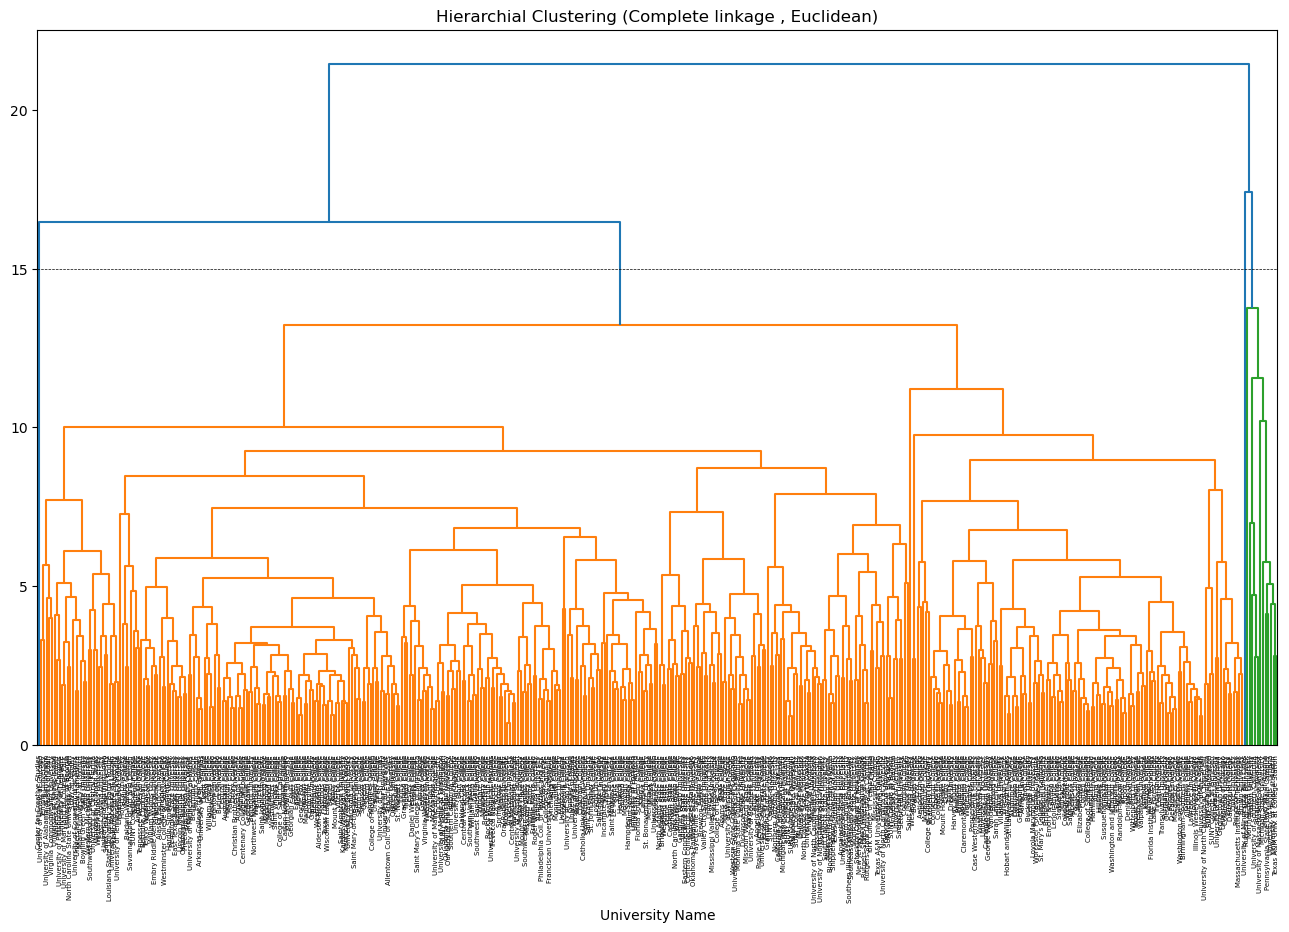

In [573]:

fig = plt.figure(figsize=(16,11))
fig.subplots_adjust (bottom=0.23)
plt.title("Hierarchial Clustering (Complete linkage , Euclidean)")
plt.xlabel("University Name")
hierarchy.dendrogram(Z,labels=df_norm.index)
plt.axhline(y=15,color='black',linewidth=0.5,linestyle='dashed')
#plt.show()
fig.savefig("Dendrogram_Clusters")


In [574]:
continuous_columns = df_norm.select_dtypes(include=['float64'])
continuous_columns.head()


,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
College Name,,,,,,,,,,,,,,,,,,,
Alaska Pacific University,-2.113591,0.610883,-0.726085,-0.766447,-0.793414,-0.650759,-0.573903,-0.710495,0.046333,-0.335086,-0.700046,-0.843743,0.667644,-0.700526,1.541090,0.276102,0.167704,-0.529598,-2.789257
University of Alaska Southeast,-2.113591,-1.636975,-0.737636,-0.778042,-0.756242,-1.300829,-1.558991,-0.658397,0.680985,-1.390805,-1.241943,0.411116,0.226150,-0.970586,-0.299262,-0.220137,-2.054792,-1.145818,-1.465311
Birmingham-Southern College,-2.033887,0.610883,-0.575673,-0.589724,-0.539768,2.112035,1.593292,-0.468871,-0.382380,0.408890,0.251873,-0.240175,0.544026,-0.728658,-0.912713,-0.604796,0.047569,0.009594,0.355113
Huntingdon College,-2.033887,0.610883,-0.624090,-0.616912,-0.714697,-0.109035,-0.426140,-0.648535,-0.434836,-0.240728,-0.579315,-1.180618,0.738283,-0.784920,-0.299262,-0.311163,-0.613173,-0.657977,-1.189489
Talladega College,-2.033887,0.610883,0.311318,-0.225084,-0.487290,0.107655,0.214168,-0.569208,-0.439369,-0.678766,-1.139785,-1.118857,-1.027693,0.109652,2.767992,0.129286,-1.033645,0.394732,-1.079161


In [575]:
# Select the data for clustering
data_for_clustering = pd.DataFrame(continuous_columns)


In [576]:
from sklearn.cluster import KMeans
k = 4  # Replace with the chosen number of clusters
kmeans = KMeans(n_clusters=k, random_state=0)
df['cluster'] = kmeans.fit_predict(data_for_clustering)


In [577]:
df['cluster']

College Name
Alaska Pacific University           1
University of Alaska Southeast      1
Birmingham-Southern College         2
Huntingdon College                  1
Talladega College                   1
                                   ..
Univ. of Wisconsin at Eau Claire    0
Wisconsin Lutheran College          1
Alderson-Broaddus College           1
Marshall University                 0
University of Wyoming               0
Name: cluster, Length: 471, dtype: int32

In [578]:
cluster_info = continuous_measurement.groupby(df['cluster']).mean()
print(cluster_info)


         # appli. rec'd  # appl. accepted  # new stud. enrolled  \
cluster                                                           
0           3394.384615       2303.692308            990.164835   
1           1050.216346        812.009615            316.302885   
2           3647.015038       2073.789474            658.781955   
3          12051.102564       8136.000000           3184.564103   

         % new stud. from top 10%  % new stud. from top 25%  # FT undergrad  \
cluster                                                                       
0                       16.098901                 43.516484     4941.571429   
1                       20.769231                 47.134615     1217.014423   
2                       46.601504                 75.451128     2634.067669   
3                       31.051282                 61.871795    16025.410256   

         # PT undergrad  in-state tuition  out-of-state tuition         room  \
cluster                                   

In [579]:
cluster_info_describe = continuous_measurement.groupby(df['cluster']).describe().T
print(cluster_info_describe)


cluster                          0            1            2             3
# appli. rec'd  count    91.000000   208.000000   133.000000     39.000000
                mean   3394.384615  1050.216346  3647.015038  12051.102564
                std    2120.909783   934.586631  3077.615355   7101.273102
                min     285.000000    77.000000   212.000000   4963.000000
                25%    1708.500000   554.500000  1611.000000   8185.500000
...                            ...          ...          ...           ...
Graduation rate min      24.000000    15.000000    51.000000     34.000000
                25%      43.000000    52.000000    73.000000     53.000000
                50%      52.000000    62.500000    83.000000     63.000000
                75%      60.500000    72.000000    91.000000     71.500000
                max      84.000000   118.000000   100.000000     95.000000

[136 rows x 4 columns]


In [580]:
categorical_columns = ['State', 'Public (1)/ Private (2)']
cluster_categorical_df = df[['cluster'] + categorical_columns]

In [581]:
cluster_categorical_df

,cluster,State,Public (1)/ Private (2)
College Name,,,
Alaska Pacific University,1,0,2
University of Alaska Southeast,1,0,1
Birmingham-Southern College,2,1,2
Huntingdon College,1,1,2
Talladega College,1,1,2
...,...,...,...
Univ. of Wisconsin at Eau Claire,0,47,1
Wisconsin Lutheran College,1,47,2
Alderson-Broaddus College,1,48,2


In [582]:
state_cluster = pd.crosstab(df['State'], df['cluster'])
state_cluster
#print(state_cluster)

cluster,0,1,2,3
State,,,,
0,0,2,0,0
1,1,2,1,0
2,0,4,0,0
3,1,0,0,1
4,0,3,11,1
5,5,0,1,0
6,2,3,4,1
7,0,0,4,0
8,0,1,0,1


In [539]:
type_cluster = pd.crosstab(df['Public (1)/ Private (2)'], df['cluster']).T
type_cluster
#print(type_cluster)


Public (1)/ Private (2),1,2
cluster,,
0,88,3
1,2,206
2,2,131
3,36,3


In [540]:
df1 = dmba.load_data("Universities.csv")

In [541]:
df1.fillna(df1.sum())

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,27392.0,57585.0,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,72728.0
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
3,University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,27392.0,57585.0,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,72728.0
4,Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,27392.0,57585.0,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,West Virginia State College,WV,1,1869.0,2415052.0,957.0,27392.0,57585.0,2817.0,1939.0,1988.0,4616.0,1500.0,1700.0,50.0,750.0,750.0,38.0,19.2,72728.0
1298,West Virginia University,WV,1,9630.0,7801.0,2881.0,23.0,49.0,14524.0,1053.0,2128.0,6370.0,2284.0,2026.0,402989.0,689666.0,1557396.0,83.0,13.4,57.0
1299,West Virginia Wesleyan College,WV,2,1566.0,1400.0,483.0,28.0,55.0,1509.0,170.0,14200.0,14200.0,1750.0,2025.0,402989.0,450.0,1100.0,58.0,16.4,67.0
1300,Wheeling Jesuit College,WV,2,903.0,755.0,213.0,15.0,49.0,971.0,305.0,10500.0,10500.0,2100.0,2445.0,402989.0,600.0,600.0,66.0,14.1,72.0


In [542]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   College Name              1302 non-null   object 
 1   State                     1302 non-null   object 
 2   Public (1)/ Private (2)   1302 non-null   int64  
 3   # appli. rec'd            1292 non-null   float64
 4   # appl. accepted          1291 non-null   float64
 5   # new stud. enrolled      1297 non-null   float64
 6   % new stud. from top 10%  1067 non-null   float64
 7   % new stud. from top 25%  1100 non-null   float64
 8   # FT undergrad            1299 non-null   float64
 9   # PT undergrad            1270 non-null   float64
 10  in-state tuition          1272 non-null   float64
 11  out-of-state tuition      1282 non-null   float64
 12  room                      981 non-null    float64
 13  board                     804 non-null    float64
 14  add. fee

In [543]:
t_df = df1[df1['College Name'] == 'Tufts University']
t_df


,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
475,Tufts University,MA,2,7614.0,3605.0,1205.0,60.0,90.0,4598.0,NaN,19701.0,19701.0,3038.0,2930.0,503.0,600.0,928.0,99.0,10.3,92.0


In [544]:
t_df = t_df.drop(columns=['College Name', 'State','Public (1)/ Private (2)'])

In [545]:
t_df = t_df.drop(columns=['# PT undergrad'])

In [546]:
concat = pd.concat([cluster_info,t_df])

In [547]:
concat = concat.fillna(concat.sum())

In [548]:
concat

,# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,3394.384615,2303.692308,990.164835,16.098901,43.516484,4941.571429,1167.472527,2294.153846,5990.681319,1935.747253,1670.219780,544.670330,530.208791,1519.373626,73.153846,17.562637,52.582418
1,1050.216346,812.009615,316.302885,20.769231,47.134615,1217.014423,400.817308,9650.379808,9684.629808,1995.706731,2033.754808,262.375000,537.932692,1270.163462,62.173077,13.840385,61.600962
2,3647.015038,2073.789474,658.781955,46.601504,75.451128,2634.067669,309.842105,15647.323308,15713.578947,2780.744361,2586.067669,385.233083,568.511278,1048.323308,87.105263,11.083459,81.639098
3,12051.102564,8136.000000,3184.564103,31.051282,61.871795,16025.410256,3712.358974,3420.102564,8498.461538,2180.589744,2063.487179,593.435897,582.717949,1949.743590,84.794872,16.033333,62.153846
475,7614.000000,3605.000000,1205.000000,60.000000,90.000000,4598.000000,5590.490915,19701.000000,19701.000000,3038.000000,2930.000000,503.000000,600.000000,928.000000,99.000000,10.300000,92.000000


In [549]:
d_norm = pairwise.pairwise_distances(t_df, metric= 'euclidean')


In [550]:
pairwise_distance = pairwise.pairwise_distances(d_norm,metric='euclidean')
dataframe = pd.DataFrame(pairwise_distance, columns=t_df.index, index=tufts_df.index)
dataframe
print(dataframe)

     475
475  0.0


In [551]:

pairwise_distance = pairwise.pairwise_distances(concat,metric='euclidean')
df2 = pd.DataFrame(pairwise_distance, columns=concat.index, index=concat.index)
df2


,0,1,2,3,475
0,0.000000,9522.163228,16761.058228,15844.884657,23094.624354
1,9522.163228,0.000000,9152.578593,21306.685381,17130.510093
2,16761.058228,9152.578593,0.000000,22532.574269,9092.220948
3,15844.884657,21306.685381,22532.574269,0.000000,23903.039075
475,23094.624354,17130.510093,9092.220948,23903.039075,0.000000


In [552]:
closest_cluster = concat.iloc[1]
print(closest_cluster)


# appli. rec'd              1050.216346
# appl. accepted             812.009615
# new stud. enrolled         316.302885
% new stud. from top 10%      20.769231
% new stud. from top 25%      47.134615
# FT undergrad              1217.014423
# PT undergrad               400.817308
in-state tuition            9650.379808
out-of-state tuition        9684.629808
room                        1995.706731
board                       2033.754808
add. fees                    262.375000
estim. book costs            537.932692
estim. personal $           1270.163462
% fac. w/PHD                  62.173077
stud./fac. ratio              13.840385
Graduation rate               61.600962
Name: 1, dtype: float64


In [553]:
average_cluster_1 = closest_cluster.mean()
print(average_cluster_1)

1731.5777149321268


In [554]:
t_df1 = df1[df1['College Name'] == 'Tufts University']
t_df1


,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
475,Tufts University,MA,2,7614.0,3605.0,1205.0,60.0,90.0,4598.0,NaN,19701.0,19701.0,3038.0,2930.0,503.0,600.0,928.0,99.0,10.3,92.0


In [555]:
tufts = t_df1.fillna(average_cluster_1)
#print(tufts)
tufts


,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
475,Tufts University,MA,2,7614.0,3605.0,1205.0,60.0,90.0,4598.0,1731.577715,19701.0,19701.0,3038.0,2930.0,503.0,600.0,928.0,99.0,10.3,92.0
